# Data Dictionary


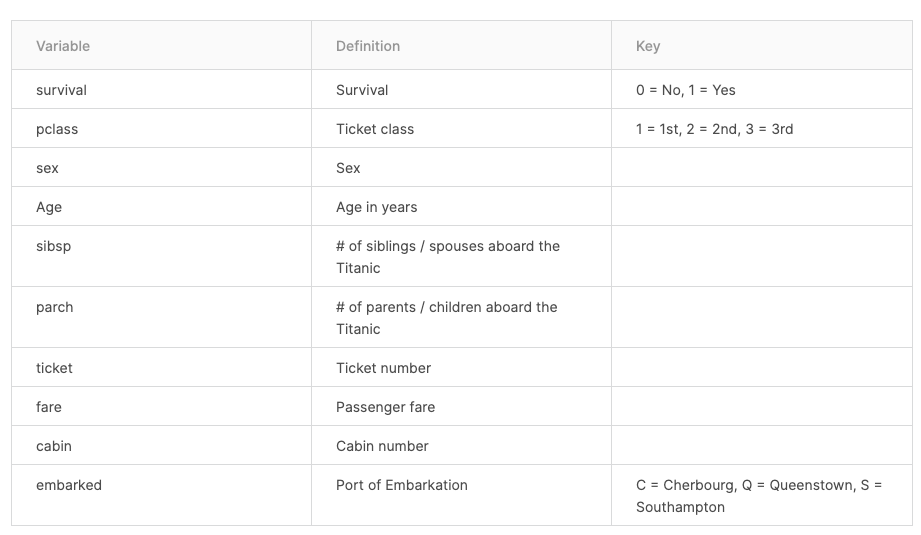

In [1]:
from PIL import Image
Image.open('images/data_dictionary.png')

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Load the data
train_df=pd.read_csv("data/train.csv")
test_df=pd.read_csv("data/test.csv")

In [4]:
#take a look at the train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#shape of the data
train_df.shape

(891, 12)

In [6]:
test_df.shape

(418, 11)

# Data Cleansing

 ['What should be the allowed percentage of Missing Values?'](https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-p)

In [7]:
# check missing values
train_df.isnull().sum()

# there are four columns contains missing values - Age, Cabin, Embarked
# The percentage of missing values in the column of Age is  (177/891=0.198) less than 20%. 
# Age is missing in around 20% of cases, but we benefit by imputing them rather than ignoring the variable.

# Cabin is missing more than 77% of cases and cannot offer us useful information for our prediction.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# check missing values for test data
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# So I will simply remove this column from train and test data
train_df.drop(columns='Cabin',inplace=True)
test_df.drop(columns='Cabin',inplace=True)
# # Besides the Cabin, the ticket number also cannot give us more useful information 
train_df.drop(columns='Name',inplace=True)
test_df.drop(columns='Name',inplace=True)

Text(0.5, 1.0, 'Distribution of Age - Test data')

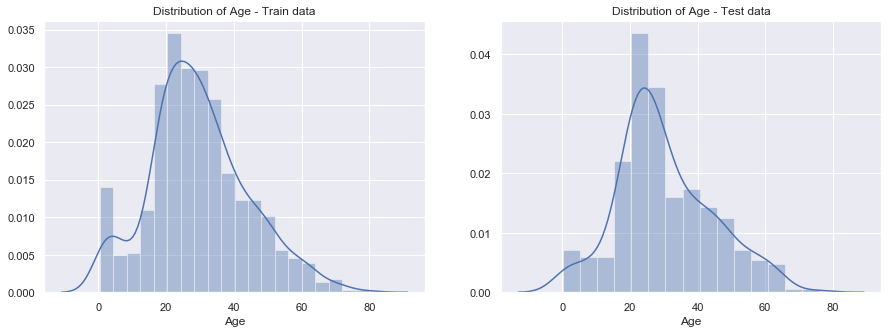

In [10]:
#
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_df.Age)
plt.title("Distribution of Age - Train data")
plt.subplot(1,2,2)
sns.distplot(test_df.Age)
plt.title("Distribution of Age - Test data")

# If there is a dataset that have great outliers, I'll prefer median. However for both datasets (Age) there is no any 
# significant outliers. So I'll fill missings with mean value.
# For more information please visit :https://en.wikipedia.org/wiki/Imputation_(statistics)


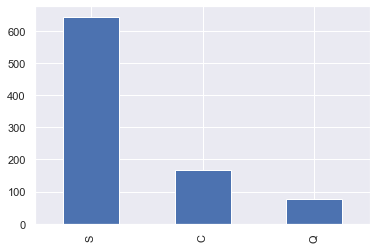

In [11]:
train_df['Embarked'].value_counts().plot(kind='bar')

In [12]:
# fill out the missing values with mean
#It is better fill out the data with mean
train_df.Age.fillna(train_df.Age.mean(), inplace=True)
train_df.Embarked.fillna(train_df.Embarked.mode()[0], inplace=True)

test_df.Age.fillna(train_df.Age.mean(), inplace=True)
test_df.Fare.fillna(train_df.Fare.mean(), inplace=True)

In [13]:
train_df.isnull().sum(),test_df.isnull().sum()

(PassengerId    0
 Survived       0
 Pclass         0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64,
 PassengerId    0
 Pclass         0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64)

In [14]:
# feature engieering
#  create a new column for gender dummy
train_df["Gender"]=[1 if i=="male" else 0 for i in train_df.Sex ]
test_df["Gender"]=[1 if i=="male" else 0 for i in test_df.Sex ]
# create a new column for Port of Embarkation
train_df["Embarkation"]=train_df["Embarked"].map({'C':0,"Q":1,"S":2})
test_df["Embarkation"]=test_df["Embarked"].map({'C':0,"Q":1,"S":2})

In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Embarkation
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,2
3,4,1,1,female,35.0,1,0,113803,53.1000,S,0,2
4,5,0,3,male,35.0,0,0,373450,8.0500,S,1,2


In [16]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Embarkation
0,892,3,male,34.5,0,0,330911,7.8292,Q,1,1
1,893,3,female,47.0,1,0,363272,7.0000,S,0,2
2,894,2,male,62.0,0,0,240276,9.6875,Q,1,1
3,895,3,male,27.0,0,0,315154,8.6625,S,1,2
4,896,3,female,22.0,1,1,3101298,12.2875,S,0,2


In [17]:
# Encode the catogorical data
from sklearn import  preprocessing
# create a function to transform the data 
def encode(data):
    le = preprocessing.LabelEncoder()
    le.fit(data)
    return le.transform(data)

In [18]:
train_df['Ticket']=encode(train_df['Ticket'])
test_df['Ticket']=encode(test_df['Ticket'])

In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Embarkation
0,1,0,3,male,22.0,1,0,523,7.2500,S,1,2
1,2,1,1,female,38.0,1,0,596,71.2833,C,0,0
2,3,1,3,female,26.0,0,0,669,7.9250,S,0,2
3,4,1,1,female,35.0,1,0,49,53.1000,S,0,2
4,5,0,3,male,35.0,0,0,472,8.0500,S,1,2


# Distribution

In [20]:
# declare target and features
features=["Pclass","Age",'SibSp','Parch', 'Fare','Gender', 'Ticket','Embarkation']
target=train_df.Survived

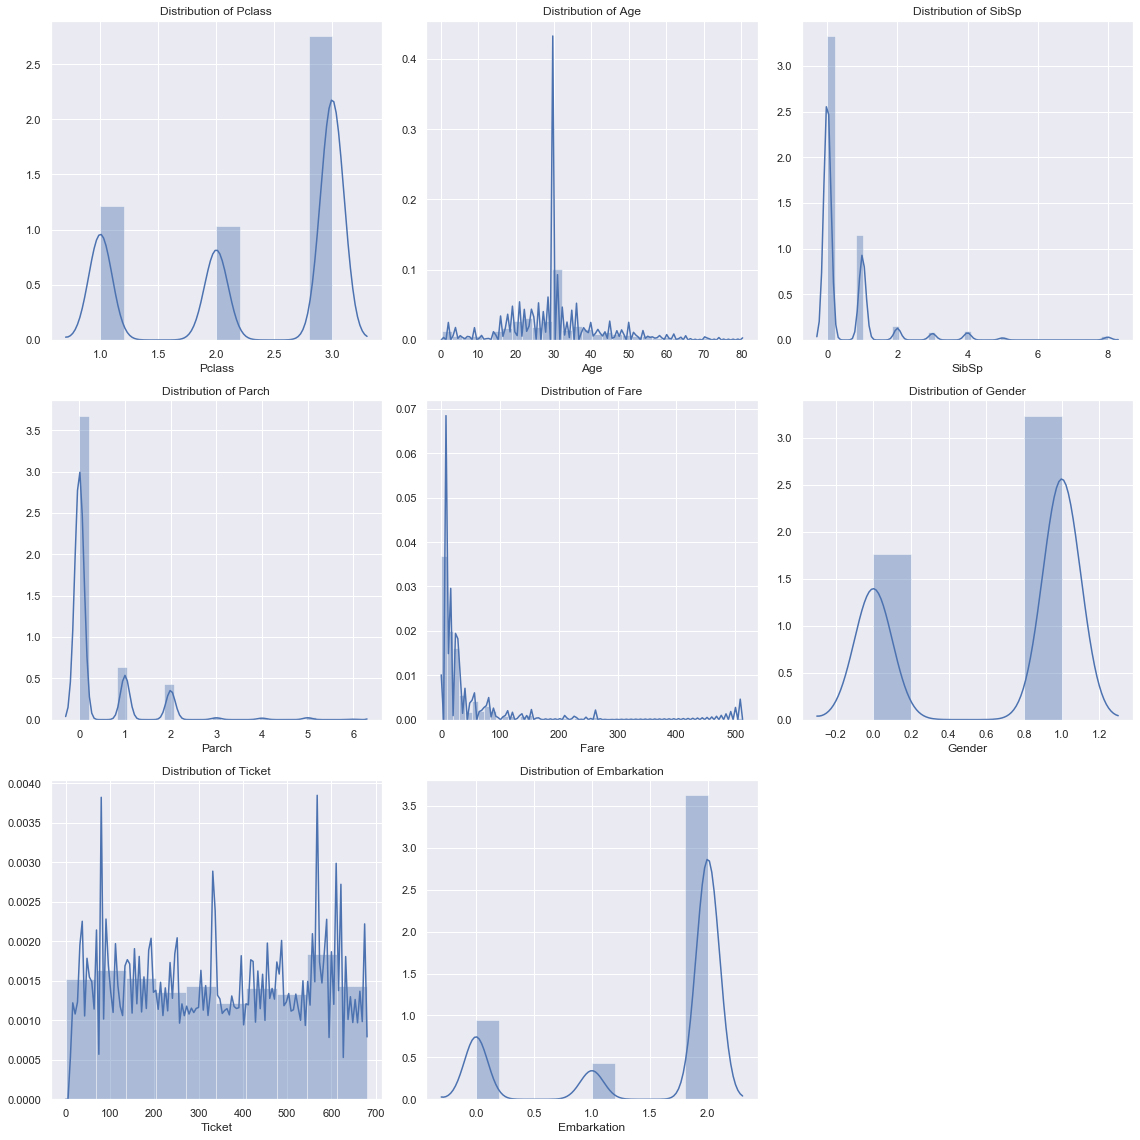

In [21]:
# distribution of features
plt.figure(figsize=(16,16))
for i in range(0,8):
    plt.subplot(3,3,i+1)
    sns.distplot(train_df[features[i]],kde_kws={'bw': 0.1})
    plt.title("Distribution of {}".format(features[i]))
plt.tight_layout()

# Pclasses
# There are 3 different Pclasses and most people are in the 3rd class  
# and the the numner of the people who are in the first and second class are simiar 

#Age
# based on the distribution of Age, we can observe that the mean of age is around 30
# and we can see there is a outlier located in left tail 
# which means some babies and kids

# Gender 
# We can see that most people are males and the data of females and males are not balanced.


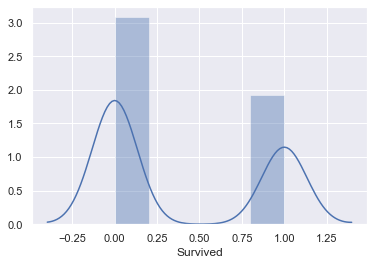

In [22]:
# target distribution
sns.distplot(target)
# we can see those two classes are not balanced
# I will use upsampling methods for the train data

# EDA

## features VS Target

In [23]:
# apart catogorical data and numerical data
cat=["Pclass","SibSp","Parch","Gender","Embarkation"] 
num=['Age','Fare']

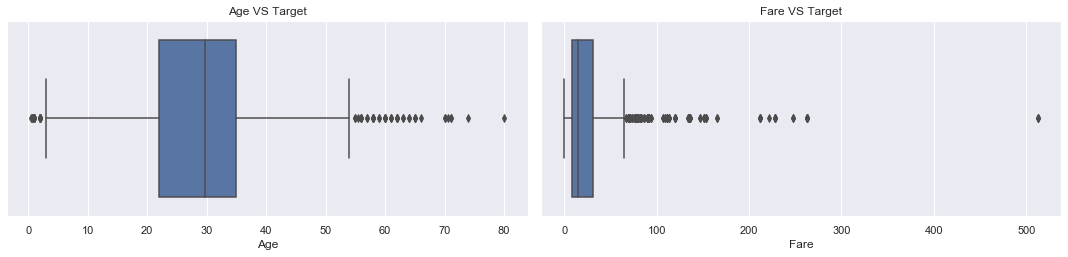

In [24]:
# catogorical data vs target
plt.figure(figsize=(15,10))
for i in range(0,2):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=num[i], hue ='Survived', data = train_df)
    plt.title("{} VS Target".format(num[i]))
plt.tight_layout()
    

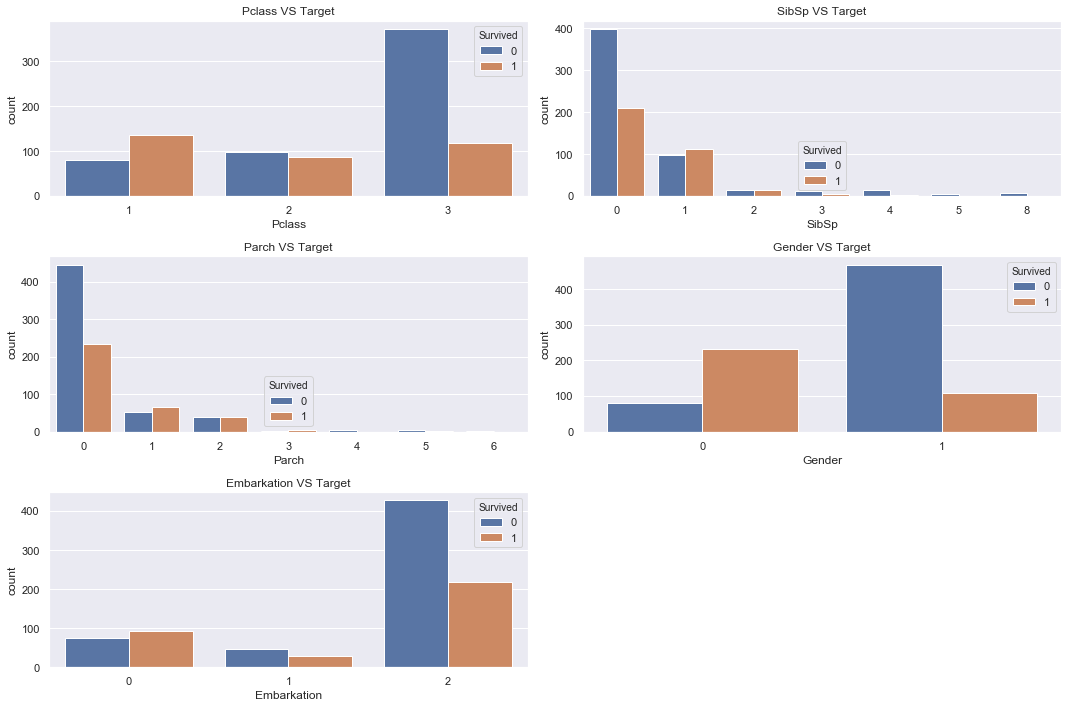

In [25]:
# catogorical data vs target
plt.figure(figsize=(15,10))
for i in range(0,5):
    plt.subplot(3,2,i+1)
    sns.countplot(x=cat[i], hue ='Survived', data = train_df)
    plt.title("{} VS Target".format(cat[i]))
plt.tight_layout()
    


# Resampling

In [26]:
from sklearn.utils import resample

In [27]:
# concatenate our training data back together
training  = pd.DataFrame()
training[train_df[features].columns]=train_df[features]
training['target']=target
training.head()

,Pclass,Age,SibSp,Parch,Fare,Gender,Ticket,Embarkation,target
0,3,22.0,1,0,7.2500,1,523,2,0
1,1,38.0,1,0,71.2833,0,596,0,1
2,3,26.0,0,0,7.9250,0,669,2,1
3,1,35.0,1,0,53.1000,0,49,2,1
4,3,35.0,0,0,8.0500,1,472,2,0


In [28]:
# separate minority and majority classes
zero= training[training.target==0]
one= training[training.target==1]

In [29]:
# Get a class count to understand the class imbalance.
print('zero count: '+ str(len(zero)))
print('one count: '+ str(len(one)))

zero count: 549
one count: 342


In [30]:
# upsample minority
one_upsampled = resample(one, # minority 
                          replace=True, # sample with replacement
                          n_samples=len(zero), # match number in majority class
                          random_state=23) # reproducible results
one_upsampled.head()

,Pclass,Age,SibSp,Parch,Fare,Gender,Ticket,Embarkation,target
241,3,29.699118,1,0,15.5000,0,444,1,1
581,1,39.000000,1,1,110.8833,0,83,0,1
98,2,34.000000,0,1,23.0000,0,117,2,1
74,3,32.000000,0,0,56.4958,1,80,2,1
604,1,35.000000,0,0,26.5500,1,9,0,1


In [31]:

# combine majority and upsampled minority
upsampled= pd.concat([zero, one_upsampled])

# check new class counts
upsampled.target.value_counts()

1    549
0    549
Name: target, dtype: int64

# Train Test Split

In [32]:
#Defining training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(upsampled.drop('target', axis=1), 
                                                  upsampled.target, 
                                                  test_size=0.25, 
                                                  random_state=1) 


In [33]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Gender,Ticket,Embarkation
427,2,19.000000,0,0,26.0000,0,170,2
524,3,29.699118,0,0,7.2292,1,217,0
188,3,40.000000,1,1,15.5000,1,435,1
662,1,47.000000,0,0,25.5875,1,496,2
506,2,33.000000,0,2,26.0000,0,180,2


In [34]:
test_data=test_df[features]

# Generating the Base First-Level Models


In [35]:
# Model Stacking method will be applied in this section

In [36]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## KNN Model

### RandomizedSearchCV

In [38]:
random_gridknn={'n_neighbors':list(range(1,100))}
knn= KNeighborsClassifier()
gs_knn=GridSearchCV(knn,random_gridknn,cv=10 )
gs_knn.fit(x_train,y_train)
gs_knn.best_params_,gs_knn.best_score_

({'n_neighbors': 1}, 0.8042756391419337)

In [40]:
knn_final= KNeighborsClassifier(n_neighbors=1)
knn_final.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Scores for Train and Validation data

In [41]:
knn_y_train_pre=knn_final.predict(x_train)
print('accuracy_score of train data :{}'.format (accuracy_score(y_train,knn_y_train_pre)))
print('f1_score of train data:{}'.format(f1_score(y_train,knn_y_train_pre))) 
# # make class predictions for the testing set
knn_y_val_pre = knn_final.predict(x_val)
print('accuracy_score of test data :{}'.format (accuracy_score(y_val, knn_y_val_pre)))
print('f1_score of test data:{}'.format(f1_score(y_val, knn_y_val_pre)) )

accuracy_score of train data :0.9987849331713244
f1_score of train data:0.99880810488677
accuracy_score of test data :0.7781818181818182
f1_score of test data:0.7765567765567766


In [42]:
# obtain predicted values
y_test_pre0=knn_final.predict(test_data)

## Random Forest

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# given prameters different values
random_grid={
             'n_estimators':list(range(1,50)),
             'max_features':list(range(1,5)),
             'max_depth':list(range(1,30)),    
             'min_samples_leaf':list(range(1,23)),
             'min_samples_split':list(range(2,21))                
             }
# random forest model
rf=RandomForestClassifier(n_jobs=-1,  random_state=42)

In [44]:
# randommized searchCV
RS=RandomizedSearchCV(rf,random_grid,cv=10,scoring="f1")

In [45]:
# fit the train data
RS.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [46]:
#obtian best parameters
RS.best_params_

{'n_estimators': 6,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_features': 1,
 'max_depth': 25}

In [47]:
# best score
RS.best_score_

0.8226512568315283

### Fit the model with best params

In [48]:
# Random Forest model with best parameters
rfc=RandomForestClassifier(n_estimators=RS.best_params_["n_estimators"],
                           max_features=RS.best_params_["max_features"],
                           max_depth=RS.best_params_["max_depth"], 
                           min_samples_split=RS.best_params_["min_samples_split"],
                           min_samples_leaf=RS.best_params_["min_samples_leaf"],
                           n_jobs=-1, 
                           random_state=42)
rfc.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

###  Scores for Train and Validation data

In [49]:
rf_y_train_pre=rfc.predict(x_train)
print('Accuracy score of train data :{}'.format(rfc.score(x_train,y_train)))
print('Train data f1_Score:{}'.format(f1_score(y_train, rf_y_train_pre)))

rf_y_val_pre=rfc.predict(x_val)
print('Accuracy score of validation  data :{}'.format(rfc.score(x_val,y_val)))
print('validation data f1_Score:{}'.format(f1_score(y_val, rf_y_val_pre)))

Accuracy score of train data :0.8857837181044957
Train data f1_Score:0.8853658536585366
Accuracy score of validation  data :0.8290909090909091
validation data f1_Score:0.8171206225680933


In [50]:
# obtain predicted values
y_test_pre1=rfc.predict(test_data)

## Neural NetWork

In [51]:
# thanks to :https://realpython.com/python-keras-text-classification/
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


- [Tuning Neural Network](https://github.com/learn-co-curriculum/dsc-tuning-neural-networks-with-regularization-lab/tree/solution)
- [Binary Classification with Deep Learning](https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/)

In [52]:
# fit the model
model = Sequential()
model.add(Dense(60, input_dim=x_train.shape[1], activation='relu', kernel_initializer='normal'))
model.add(Dense(30,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=50, 
                 epochs=100, validation_data = (x_val, y_val),verbose=0)

###  Scores for Train and Validation data

In [53]:
nn_y_train_pre = model.predict_classes(x_train)
nn_f1_score_train=f1_score(y_train,nn_y_train_pre)
print('Accuracy score of train  data :{}'.format(accuracy_score(y_train,nn_y_train_pre)))
print("Train data f1 score:{}".format(nn_f1_score_train))

nn_val_pre = model.predict_classes(x_val)
nn_f1_score_val=f1_score(y_val,nn_val_pre)
print('Accuracy score of validation  data :{}'.format(accuracy_score(y_val,nn_val_pre)))
print("Validation data f1 score:{}".format(nn_f1_score_val))

Accuracy score of train  data :0.8080194410692588
Train data f1 score:0.8029925187032418
Accuracy score of validation  data :0.8036363636363636
Validation data f1 score:0.784


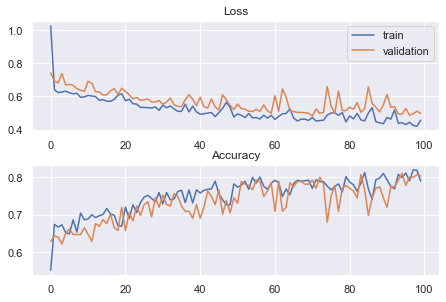

In [54]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.tight_layout(0)
plt.show()

In [55]:
# checkout the confusion_matrix
from sklearn.metrics import confusion_matrix

print("confusion_matrix:{}".format(confusion_matrix(y_val, nn_val_pre)))

confusion_matrix:[[123  22]
 [ 32  98]]


In [56]:
# obtain predicted values
y_test_pre2=model.predict_classes(test_data)

#  Model Stacking

## Data preparation

First-level output as new features
Having now obtained the first-level predictions, one can think of it as essentially building a new set of features to be used as training data for the next classifier. As per the code below, we are therefore having as our new columns the first-level predictions from our earlier classifiers and we train the next classifier on this.

In [57]:
x_train_stack = pd.DataFrame( {
     'Logistic_Regression':knn_y_train_pre.ravel(),
           'Random_Forest':rf_y_train_pre.ravel(),
          'Neural_Network':nn_y_train_pre.ravel()                                      
    })

x_train_stack.head()

,Logistic_Regression,Random_Forest,Neural_Network
0,1,1,1
1,0,0,0
2,0,0,0
3,0,0,0
4,1,1,1


In [58]:
x_val_stack = pd.DataFrame( {
    
     'Logistic_Regression':knn_y_val_pre.ravel(),
           'Random_Forest':rf_y_val_pre.ravel(),
          'Neural_Network':nn_val_pre .ravel()  
                                        })

x_val_stack.head()

,Logistic_Regression,Random_Forest,Neural_Network
0,1,1,1
1,0,0,0
2,1,0,1
3,1,1,0
4,0,1,1


In [59]:

x_test_stack = pd.DataFrame( {
    
     'Logistic_Regression':y_test_pre0.ravel(),
           'Random_Forest':y_test_pre1.ravel(),
          'Neural_Network':y_test_pre2.ravel()  
                                        })

x_test_stack.head()

,Logistic_Regression,Random_Forest,Neural_Network
0,1,0,0
1,0,0,1
2,0,0,0
3,0,0,0
4,1,1,1


## XGboost

In [60]:
import xgboost as xgb
# given prameters different values
Random_Grid={
             'n_estimators':list(range(1,100)),
               'max_depth':list(range(1,30)),
            'min_samples_leaf':list(range(1,23)),
              'min_samples_split':list(range(2,21)) ,
    'max_depth':[1,2,3]
             }

In [61]:
# xgboost  model
gbm = xgb.XGBClassifier(
                         n_jobs=-1,  
                         random_state=0)
# randommized searchCV
rs=RandomizedSearchCV(gbm,Random_Grid,cv=20,scoring="f1")

In [62]:
# fit the train data
rs.fit(x_train_stack,list(y_train))

RandomizedSearchCV(cv=20, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1,...
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                     

In [63]:
# obtian best parameters best score
rs.best_score_,rs.best_params_
#(0.9988888888888889, {'n_estimators': 72, 'max_depth': 26})


(0.9988372093023254,
 {'n_estimators': 99,
  'min_samples_split': 14,
  'min_samples_leaf': 16,
  'max_depth': 2})

In [64]:
GBM = xgb.XGBClassifier(
                         n_estimators=rs.best_params_["n_estimators"],
                           min_samples_split=rs.best_params_["min_samples_split"],
                           min_samples_leaf=rs.best_params_["min_samples_leaf"],
                           max_depth=rs.best_params_["max_depth"],
                        n_jobs=-1,  
                        random_state=0)
# fit the model 
GBM.fit(x_train_stack, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, min_samples_leaf=16, min_samples_split=14,
              missing=None, n_estimators=99, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [65]:
#predictions
train_pre=GBM.predict(x_train_stack)
val_pre=GBM.predict(x_val_stack)
# obtian f1 score
f1_score_train=f1_score(y_train,train_pre)
f1_score_val=f1_score(y_val,val_pre)
# Score for train data
print("Score of train data :" , accuracy_score(y_train,train_pre))
print("F1 Score of train data :" , f1_score_train)
# Score for test data 
print("Score of validation data :" , accuracy_score(y_val,val_pre))
print("F1 Score of validation data :" ,f1_score_val)

Score of train data : 0.9987849331713244
F1 Score of train data : 0.99880810488677
Score of validation data : 0.7781818181818182
F1 Score of validation data : 0.7765567765567766


## Confusion Matrix

In [66]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[108  37]
 [ 24 106]]


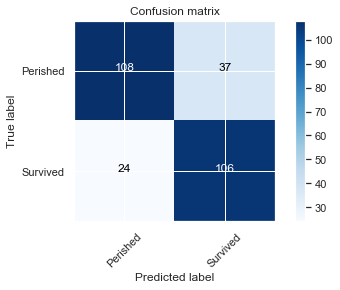

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,val_pre)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

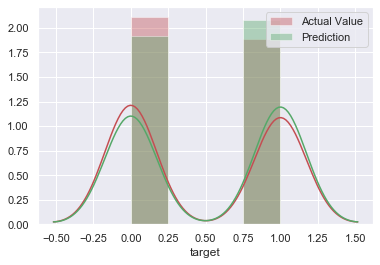

In [68]:
sns.distplot(y_val,color='r',label='Actual Value')
sns.distplot(val_pre,color='g',label='Prediction')
plt.legend()

# Submision

In [69]:
# prediction for test data 
y_test_pre=GBM.predict(x_test_stack)

In [70]:
# combine with our data
test_df["Survived"]=y_test_pre

In [71]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Embarkation,Survived
0,892,3,male,34.5,0,0,152,7.8292,Q,1,1,1
1,893,3,female,47.0,1,0,221,7.0000,S,0,2,0
2,894,2,male,62.0,0,0,73,9.6875,Q,1,1,0
3,895,3,male,27.0,0,0,147,8.6625,S,1,2,0
4,896,3,female,22.0,1,1,138,12.2875,S,0,2,1


In [72]:
# submission
submission=test_df[['PassengerId','Survived']]
submission.head()

,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,0
4,896,1


In [73]:
submission.to_csv('submission.csv', index=False)